In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
stocks = input("Enter the Code of a Stock:- ") 
df =  yf.download(stocks, '2008-01-01', '2021-6-18', auto_adjust=True) 
df.head()

Enter the Code of a Stock:- BK
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2007-12-31,36.571891,36.993207,36.361233,36.684742,3601300
2008-01-02,36.729900,36.835229,35.119864,35.458424,7066300
2008-01-03,36.263425,37.166250,36.173144,36.993206,7169000
2008-01-04,36.722364,36.955592,36.105435,36.225811,6693800
2008-01-07,36.376285,37.151211,35.812020,36.722370,6205600


In [ ]:
df.keys()

## input data are open,close,high,low

## target variable is price is predicted

In [6]:
df.shape

(3390, 5)

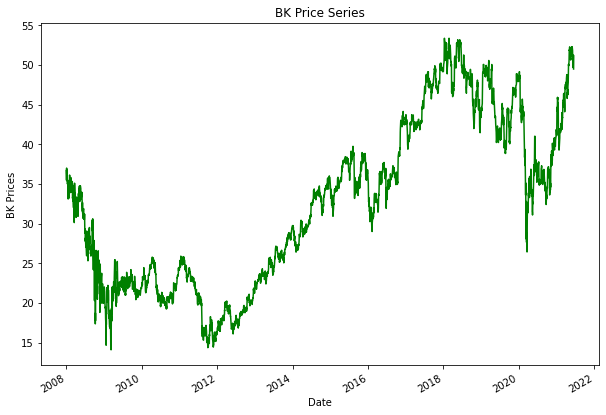

In [12]:
df.Close.plot(figsize=(10, 7),color='g')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

In [13]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

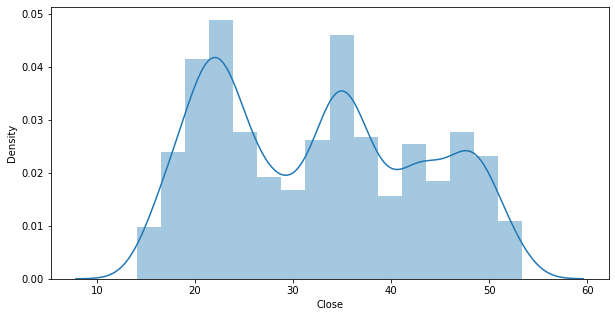

In [28]:
plt.figure(figsize=(10,5))
sns.distplot(df['Close'])

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open', ylabel='Density'>

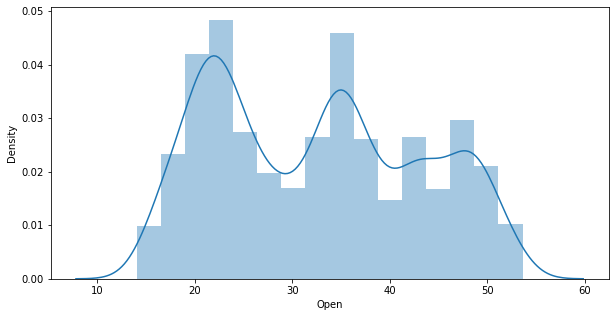

In [29]:
plt.figure(figsize=(10,5))
sns.distplot(df['Open'])

In [30]:
X = df.drop("Close", axis=1)  # open,high,low
y = df["Close"] # close


In [33]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(2373, 4)
(1017, 4)
(1017,)
(2373,)


In [37]:
from sklearn.metrics import mean_squared_error, r2_score
def calculated_metrics(y_test, y_pred): 
    mse = mean_squared_error(y_test, y_pred) 
    rmse = np.sqrt(mse) 
    r2_scores = r2_score(y_test, y_pred) 
    
    print("MSE:- ", mse) 
    print("RMSE:- ", rmse) 
    print("r2_score:- ", r2_scores)     

In [38]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
calculated_metrics(y_test, lr_pred)


MSE:-  0.08273206219380708
RMSE:-  0.2876318170748971
r2_score:-  0.999270624540766


In [39]:
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge 

la_r = Lasso().fit(X_train, y_train)
ra_r = Ridge().fit(X_train, y_train)

la_r_pred = la_r.predict(X_test) 
ra_r_pred = ra_r.predict(X_test)

E:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.61516830292567, tolerance: 26.006174699877494
  model = cd_fast.enet_coordinate_descent(


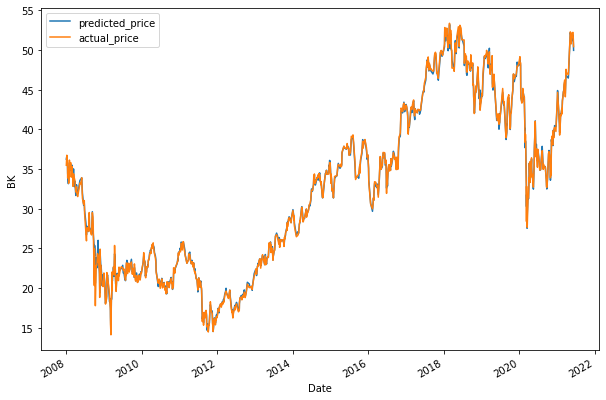

In [40]:
predicted_price = la_r.predict(X_test)
predicted_price = pd.DataFrame(
predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("BK")
plt.show()

In [42]:
print("Lasso Regression")
print("------------------------------")
calculated_metrics(y_test,la_r_pred)

Lasso Regression
------------------------------
MSE:-  0.16404822449862336
RMSE:-  0.4050286712056609
r2_score:-  0.9985537318192322


In [43]:
print("Ridge Regression")
print("------------------------------")
calculated_metrics(y_test,ra_r_pred)

Ridge Regression
------------------------------
MSE:-  0.08275135166077793
RMSE:-  0.2876653466456777
r2_score:-  0.9992704544825871


In [44]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 

svr = SVR()  

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3) 
  
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.029, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.000, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.002, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.001, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.002, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.029, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.000, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.002, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.001, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.002, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ....... C=10, gamma=0.01, kernel=rbf, score=-0.012, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.002, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ....... C=10, gamma=0.01, kernel=rbf, score=-0.006, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ....... C=10, gamma=0.01, kernel=rbf, score=-0.001, total=   0.4s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.002, total=   0.4s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ...... C=10, gamma=0.001, kernel=rbf, score=-0.012, total=   0.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] .... C=1000, gamma=0.001, kernel=rbf, score=-0.000, total=   0.4s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.006, total=   0.6s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ... C=1000, gamma=0.0001, kernel=rbf, score=-0.012, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.006, total=   0.5s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ... C=1000, gamma=0.0001, kernel=rbf, score=-0.004, total=   0.5s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ... C=1000, gamma=0.0001, kernel=rbf, score=-0.007, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.002, total=   0.4s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   45.3s finished


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [45]:
grid.best_estimator_

SVR(C=100, gamma=0.01)

In [46]:
svr = SVR(C=10, gamma=0.01, kernel='rbf') 
svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_test) 

In [47]:
calculated_metrics(y_test, svr_pred) 

MSE:-  112.48770592256005
RMSE:-  10.606022153595571
r2_score:-  0.00829533327423837


In [48]:
 import joblib
joblib.dump(ra_r, 'model.pkl')
ridge_from_joblib = joblib.load('model.pkl') 

In [55]:
X_test

,Open,High,Low,Volume
Date,,,,
2013-02-25,23.306604,23.373673,22.485004,5871000
2010-08-18,20.180251,20.212132,19.941149,5116800
2010-07-28,20.809892,20.905532,20.044763,12322300
2018-10-11,46.687338,47.159584,45.492841,8144600
2014-08-29,33.679974,33.818042,33.576424,3926600
...,...,...,...,...
2016-03-14,33.131875,33.459562,32.963604,4842200
2011-08-09,17.194318,17.340101,15.809378,26860000
2013-11-05,27.485000,27.672206,27.323325,3148900


In [49]:
ridge_from_joblib.predict(X_test)

array([22.75381077, 20.00395397, 20.34041763, ..., 27.47916992,
       49.7910645 , 47.62000459])

X_test and y_test is compared to check for the overfitting and underfitting like wise X_train and y_train is compared ......

In [51]:
y_test


Date
2013-02-25    22.485004
2010-08-18    20.012880
2010-07-28    20.156345
2018-10-11    45.548397
2014-08-29    33.809414
                ...    
2016-03-14    33.326717
2011-08-09    17.097130
2013-11-05    27.527546
2018-03-19    49.836189
2018-11-27    47.861736
Name: Close, Length: 1017, dtype: float64

In [52]:
ridge_from_joblib.predict(X_train)

array([46.48049993, 34.12180717, 20.92825853, ..., 33.98949498,
       52.06016851, 44.64583181])

In [53]:
y_train

Date
2019-11-21    46.366470
2015-09-30    34.370041
2010-06-16    20.944782
2012-02-13    17.518286
2011-12-14    15.141978
                ...    
2011-04-25    22.725231
2020-12-16    39.883171
2014-07-25    34.025150
2018-05-09    52.374554
2018-11-05    44.693939
Name: Close, Length: 2373, dtype: float64

In [54]:
ridge_from_joblib.predict([[36.571891,36.993207,36.361233,3601300]])

array([36.71882014])

In [56]:
ridge_from_joblib.predict([[33.679978,33.818042,33.576424,3926600]])

array([33.67483942])